그래도 처음하는거는 클론 코딩으로 진행해야 한다고 시작함

# 정규성 검정

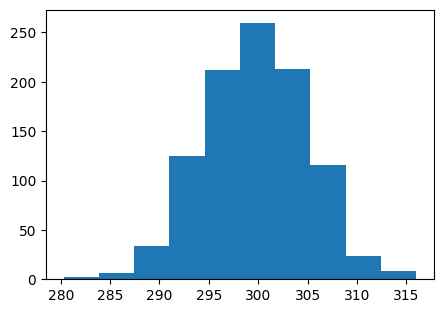

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,3.5)
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [7]:
from scipy.stats import shapiro
print(shapiro(df))

# 샤피로 검정시 p-value가 0.34이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 없다

ShapiroResult(statistic=0.9981446862220764, pvalue=0.3485966622829437)


- 귀무가설: 데이터는 정규성을 가진다
- 대립가설: 데이터는 정규성을 가지지 않는다
- p-value: 데이터가 귀무가설과 얼마나 일치하는지(높을수록 가설을 따름)  
- 여기서 p-value는 유의 확률(significance probability)를 의미한다. 이 값은 가정(귀무가설을 따름)을 따른다고 가정할때 결과의 극단적일 확률을 보여준다. 이 값이 작을수록 데이터와 가설이 다를 가능성이 높다고 본다.


여기서는 p-value가 0.05보다 높으므로 정규성을 띤다

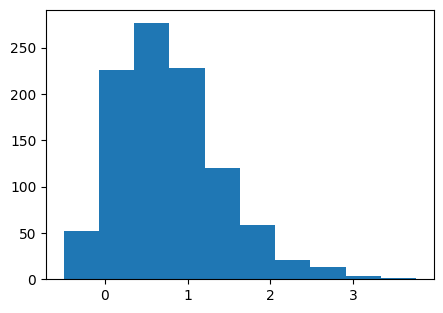

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [9]:
from scipy.stats import shapiro
print(shapiro(df))

# 샤피로 검정시 p-value가 2.3e-16 이므로 유의수준 5%에서 귀무가설인 "데이터는 정규성을 가진다"를 기각하고 대립가설을 채택한다
# 데이터는 정규성을 가지지 않는다

ShapiroResult(statistic=0.9578887224197388, pvalue=2.309859641255865e-16)


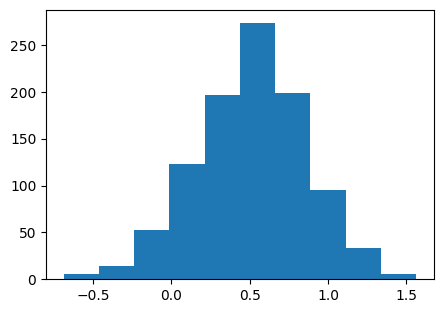

In [10]:
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)

plt.hist(log_y_data)
plt.show()


In [11]:
from scipy.stats import shapiro
print(shapiro(log_y_data))

# 샤피로 검정시 p-value가 0.17이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 없다

ShapiroResult(statistic=0.9976893067359924, pvalue=0.17551212012767792)


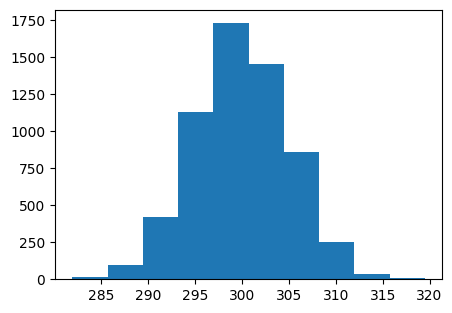

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [13]:
from scipy.stats import shapiro
print(shapiro(df))
# 샤피로 검정시 p-value가 0.15 이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 없다.
# 하지만 경고 메세지에서도 보이듯이 5000개 초과의 샘플에 대해서는 샤피로 검정은 정확하지 않을 수 있다.


from scipy.stats import anderson
# anderson 검정을 실시한다
print(anderson(df['data'].values))


# anderson 검정 결과의 의미는 아래 링크에서 확인 가능
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html 
# significance_level는 유의 확률값을 나타내며 critical_values는 각 유의 확률값의 기준점이 된다.
# 5%유의 수준에서 검정을 진행하려면 statistic값인 0.82이 significance_level 이 5.에 위치한 인덱스를 
# critical_values값에서 비교하면 된다. 그 값은 0.786이므로 이보다 큰 0.82을 가지므로 
# 귀무가설을 기각하고 대립가설을 채택한다 -> 데이터는 정규성을 가지지 않는다고 판단한다. (p-value와 기각기준 부등호 개념이 반대)

ShapiroResult(statistic=0.9995355606079102, pvalue=0.15070641040802002)
AndersonResult(statistic=0.8266993530414766, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


c:\Users\hjhhi\Anaconda3\envs\BBG\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


위에 설명한 대로 샤피로 검정은 대규모 데이터(5000개 이상)에서 부정확할 가능성이 있다.

이럴때 앤더슨 검정을 사용하는데 사용법이나 출력값이 샤피로 검정이랑 조금 다른걸 chk하자  
또 앤더슨 검정은 샤피로랑 다르게 critical_value를 통해 귀무가설과 비교하는것 같다. 이때 p-value와 대소관계가 반대(크면 귀무가설 기각)이므로 chk 범위(5%)는 동일하다

# 단일 표본 T검정

```{admonition} Question 
**100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.        
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.**
```

(array([ 6.,  7., 11., 15., 16., 12., 18.,  8.,  6.,  1.]),
 array([150.44114707, 154.07327979, 157.70541251, 161.33754524,
        164.96967796, 168.60181068, 172.23394341, 175.86607613,
        179.49820885, 183.13034158, 186.7624743 ]),
 <BarContainer object of 10 artists>)

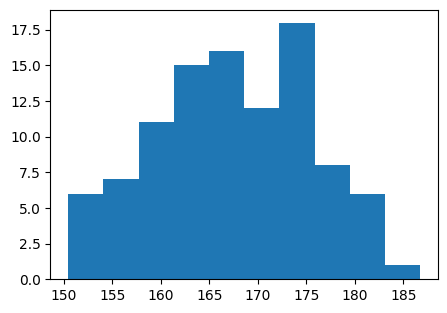

In [15]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
plt.hist(df)

In [16]:
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

# 정규성 검정 샤피로
static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value : ',pvalue,'이므로')

if pvalue < 0.05:
    print('귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.\n')
    print('윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')
    
    #윌콕슨 부호순위 검정
    static, pvalue = wilcoxon(df['height']-165) # or static, pvalue = wilcoxon(df['height'], np.ones(len(df)) *165)
    
    
    
    if pvalue < 0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')
    
    
else:
    print('귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다.\n')
    print('단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')
    
    #단일 표본 t 검정
    static, pvalue = ttest_1samp(df['height'],165) 
    if pvalue < 0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')  

샤피로 정규성 검정 p-value :  0.455832302570343 이므로
귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다.

단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다
검정 결과 pvalue는 0.0018367171548080209로 결과는 귀무가설을 기각하고 대립가설을 채택한다.


정규성을 만족하는 때에 단일 표본 t검정이 가능함  
- 단일표본 t검정: 데이터의 평균이 특정 값(165)와 유사한지 확인  
  
얘도 p-value를 반환하는데 동일하게 5%이하일때만 귀무가설 기각 

In [17]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')

In [18]:
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

# 정규성 검정 샤피로
static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value : ',pvalue,'이므로')

if pvalue < 0.05:
    print('귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.\n')
    print('윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')
    
    #윌콕슨 부호순위 검정
    static, pvalue = wilcoxon(df['height']-165) # or static, pvalue = wilcoxon(df['height'], np.ones(len(df)) *165)
    
    
    
    if pvalue < 0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')
    
    
else:
    print('귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다.\n')
    print('단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')
    
    #단일 표본 t 검정
    static, pvalue = ttest_1samp(df['height'],165) 
    if pvalue < 0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')  

샤피로 정규성 검정 p-value :  0.013552471995353699 이므로
귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.

윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다
검정 결과 pvalue는 0.04880534424649582로 결과는 귀무가설을 기각하고 대립가설을 채택한다.


코드 자체는 위와 하나도 변하지 않았다.  
정규성을 만족하지 않으면 비모수 검정(여기서는 윌콕슨 검정)을 진행함  

***얘는 이전의 검정과 다르게 df[i]-예측 평균값을 넣어줘야함*** 결과값에 대한 해석은 p-value와 동일

# 등분산 검정

```{admonition} Question 
**두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라**
```

In [20]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [21]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

a = df[df['class'] =='A'].score
b = df[df['class'] =='B'].score

print(bartlett(a,b))

print(fligner(a,b,center='median')) #default
print(fligner(a,b,center='mean')) 

print(levene(a,b, center='median')) #default
print(levene(a,b,center='mean'))


# 등분산검정의 방법은 3가지가 있다. pvalue값은 5% 유의수준이라면 0.05보다 작은 경우 "각 그룹은 등분산이다"라는 귀무가설을 기각한다

# 아래의 결과를 보면 모두 0.05보다 크므로 귀무가설을 기각할수 없음을 알 수 있다.

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


- 등분산성: 두 그룹 이상의 데이터의 분산이 통계적으로 동일한지 확인  
- 귀무가설: 모든 그룹의 데이터의 분산이 동일하다
- 대립가설: 한 그룹이라도 분산이 다른 데이터가 존재함  

바틀릿?은 정규성 가정한 검정이고 아래 두개는 비모수적

In [22]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [23]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene


print(bartlett(df.A,df.B))
print(fligner(df.A,df.B))
print(levene(df.A,df.B))

# BartlettResult -> 등분산이다  // FlignerResult , LeveneResult -> 등분산이 아니다

BartlettResult(statistic=2.3832178811043527, pvalue=0.12264468401745829)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)
LeveneResult(statistic=5.147914610463281, pvalue=0.023868975493455683)


In [24]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [25]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene


print(bartlett(df.A,df.B))
print(bartlett(df.A,df.B.dropna()))
print()

print(fligner(df.A,df.B))
print(fligner(df.A,df.B.dropna()))
print()

print(levene(df.A,df.B))
print(levene(df.A,df.B.dropna()))

# bartlett ,fligner 두 검정은 nan값을 지우고 사용해야한다. LeveneResult의 경우 nan값이 포함된다면 연산이 제대로 안된다

BartlettResult(statistic=4.119254834772108, pvalue=0.04239774936707851)
BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748438)

FlignerResult(statistic=372.546422798273, pvalue=5.22112391778621e-83)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793619)

LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063284)


등분산검정 할때는 nan 빼자

# 독립표본 검정

독립 표본 t검정의 경우 집단의 정규성에 따라 접근방식이 다르다    
정규성 검정은 shapiro , anderson(샘플 5000개 이상) 을 통해 확인

**데이터가 정규성을 가지는 경우(모수적 검정)**    
두 집단의 등분산 검정을 한 후      
from scipy.stats import ttest_ind     
`등분산일 경우 `     
$
\begin{align}
t = \dfrac{\bar{x}_1 - \bar{x}_2}{s \cdot \sqrt{\dfrac{1}{N_1}+\dfrac{1}{N_2}}}
\tag{equalvar=True}
\end{align}
$
             
   
`등분산이 아닐 경우`    
$
\begin{align}
t = \dfrac{\bar{x}_1 - \bar{x}_2}{\sqrt{\dfrac{s_1^2}{N_1} + \dfrac{s_2^2}{N_2}}}
\tag{equalvar=False , welch t-test}
\end{align}
$


**데이터가 정규성을 가지지 않는 경우(비모수적 검정)**

```{admonition} Question 
**두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라**
```

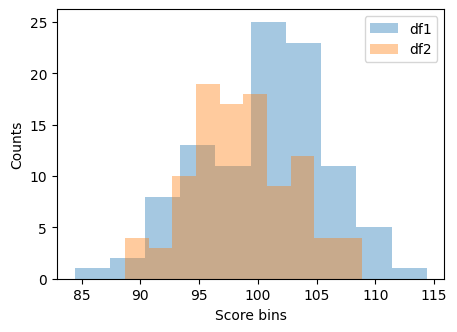

In [30]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [31]:
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))

# 두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각 하지 못한다. 두 그룹은 정규성을 가진다.

from scipy.stats import levene
print()
print(levene(df1['data'],df2['data']))
# 두그룹은 levene 검정을 확인해 본결과 pvalue 는 0.11로 귀무가실을 기각히지 못한다. 그러므로 등분산은 가진다

from scipy.stats import ttest_ind
print()
print(ttest_ind(df1,df2,equal_var=True))

# 등분산이기 때문에 equal_var=True 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행한다
# pvalue는 0.006이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고 대립가설을 채택한다

ShapiroResult(statistic=0.9860947728157043, pvalue=0.37968069314956665)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)

LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)

Ttest_indResult(statistic=array([2.76719074]), pvalue=array([0.00619015]))
